

## 배깅(회귀)
### 앙상블 기법

- 주어진 자료로부터 여러 개의 예측 모형들을 만든 후 예측모형들을 조합하여 하나의 최종 예측모형을 만드는 방법
- 편향, 잡음 및 분산으로 인한 오류와 같은 문제를 회피하기 위해 사용됨
- 의사결정나무에 주로 사용
- <b>배깅</b>(bagging)과 <b>부스팅</b>(boosting), <b>랜덤 포레스트</b> (random forest)가 가장 대표적

<br>

### 붓스트랩 (Bootstrap)
- 랜덤 샘플링의 일종으로 가설 검증을 하거나 통계 계산을 하기 전에 <b>단순임의복원추출법</b>(중복허용)을 적용하여 여러 개의 동일한 크기의 표본 자료를 획득하는 방법
- 주어진 데이터를 원래의 모집단을 대표하는 독립 표본으로 가정하고, 그 자료로부터 중복을 허용한 무작위 재추출을 하여 복수의 자료를 획득하고 각각에서 통계량을 계산
<img src=./bootstrap.png width="600">

<br>



### 배깅 (Bagging: Bootstrap aggregating)
- 주어진 자료를 모집단으로 생각하여 주어진 자료에서 여러 개의 붓스트랩 자료를 생성하고 각 붓스트랩 자료에 예측 모형을 만든 후 결합하여 최종 예측모형을 만드는 방법
- 통계분류와 회귀 분석에서 사용되는 머신러닝 알고리즘의 안정성과 정확도를 향상시키기 위해 고안된 일종의 앙상블 학습법의 알고리즘
- 분산을 줄이고 정확도를 개선하여 모델의 안정성을 크게 높여 과적합(overfitting)을 피하도록 함

<img src='./bagging.png' width=900/>

- 붓스트래핑, 모델링, 보팅 순으로 진행됨
- 보팅(voting) : 여러 개의 모형으로부터 산출된 결과 중 다수결에 의해 최종 결과를 선정하는 과정
- 최적 의사결정 나무 구축에서 가장 어려운 가지치기를 진행하지 않고 약한 학습자인 나무를 최대로 성장시킨 후 보팅함
- 훈련자료의 모집단의 분포를 몰라 평균예측모형을 구할 수 없다는 문제를 해결하기 위해 훈련 자료를 모집단으로 생각하고 평균예측모형을 구하여 분산을 줄이고 예측력을 향상시킴
- <b>부스팅과의 차이점</b>
    - 주어진 자료보다 분산이 적은 앙상블 모델을 얻는 데 중점을 둠
    - 각 붓스트랩에 대해 붓스트래핑 및 모델링 과정이 병렬적으로 수행됨

<br><br>

> sklearn.ensemble.BaggingRegressor(<br>
&emsp; &emsp; base_estimator=None, <br>
&emsp; &emsp; n_estimators=10, <br>
&emsp; &emsp; max_samples=1.0, max_features=1.0, <br>
&emsp; &emsp; bootstrap=True, <br>
&emsp; &emsp; bootstrap_features=False, <br>
&emsp; &emsp; oob_score=False)




base_estimator : 배깅에서 수행할 분류기 (None이면 DecisionTreeClassifier를 수행)<br>
n_estimators : 앙상블의 분류기 모델의 수 (int, default=10)<br>
max_samples : 각 기본 추정량을 훈련하기 위해 추출 할 샘플 수 (int or float, default=1.0)<br>
max_features : 각 기본 추정량을 훈련하기 위해 사용할 컬럼의 수 (int or float, default=1.0)<br>
bootstrap : 샘플(행)을 복원추출할지 여부 (bool, default=True)<br>
bootstrap_features : feature(열)를 복원추출할지 여부 (bool, default=False)<br>
oob_score : 일반화 오류를 추정하기 위해 out-of-bag 샘플을 사용할지 여부 (bool, default=False)

<br><br>

> BaggingRegressor().fit(X, Y) # 모델 적합<br>
> BaggingRegressor().predict(X) # 모델을 사용하여 종속변수 값 예측<br>
> BaggingRegressor().estimators_samples_ # 각 분류기 생성에 사용된 샘플의 인덱스

<br>

<b>[예제]</b>
kc_house_data.csv를 train과 test 데이터로 분할하고 train 데이터를 활용하여 BaggingRegressor 모델을 만들어라

In [1]:
import pandas as pd 
df = pd.read_csv('../data/kc_house_data.csv')
df = df.drop(['id','date'], axis=1)

X = df.drop('price',axis=1)
y = df['price']

X = pd.get_dummies(data = X, columns=['waterfront'])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2021)

In [2]:
from sklearn.ensemble import BaggingRegressor
model_bag_reg = BaggingRegressor()
model_bag_reg.fit(X_train, y_train)
print(model_bag_reg.score(X_train,y_train))
print(model_bag_reg.score(X_test, y_test))

0.9482591476153137
0.7534236745465055


Out of Bag 샘플을 활용한 성능 측정

In [3]:
model_bag_reg_oob = BaggingRegressor(n_estimators=100, 
                             oob_score=True)
model_bag_reg_oob.fit(X, y)

print(f"oob score : {model_bag_reg_oob.oob_score_}")

oob score : 0.7535527208561923


In [4]:
model_bag_reg = BaggingRegressor(n_estimators=100)
model_bag_reg.fit(X_train, y_train)
print(model_bag_reg.score(X_train,y_train))
print(model_bag_reg.score(X_test, y_test))

0.964284154225022
0.7581107006689407


In [7]:
from sklearn import tree
model_bag_reg.estimators_[0].feature_importances_

array([0.00951675, 0.02457485, 0.28208744, 0.02851607, 0.00894546,
       0.04282814, 0.0067157 , 0.35581146, 0.02454131, 0.01256344,
       0.10275019, 0.0042037 , 0.05311825, 0.03579746, 0.00739053,
       0.00063927])

In [9]:
## 변수의 중요도 확인

import numpy as np
importances = pd.DataFrame(np.mean([tree.feature_importances_ for tree in model_bag_reg.estimators_], axis=0))
feature_importances = pd.concat([pd.DataFrame(X.columns), importances], axis=1)
feature_importances.columns=["col_name","feature_importance"]
feature_importances

# 변수의 상대적 중요도를 보았을 때 회귀 계수처럼 파악을 할 수 있다. 
# 변수 중요도가 큰 것을 파악할 수 있음

,col_name,feature_importance
0,bedrooms,0.008447
1,bathrooms,0.021769
2,sqft_living,0.254212
3,sqft_lot,0.034813
4,floors,0.006083
5,view,0.024038
6,condition,0.006700
7,grade,0.369593
8,sqft_above,0.026958
9,sqft_basement,0.013626


In [10]:
feature_importances = feature_importances.sort_values(by="feature_importance",ascending=False).reset_index(drop=True)
feature_importances

,col_name,feature_importance
0,grade,0.369593
1,sqft_living,0.254212
2,yr_built,0.099558
3,sqft_living15,0.063604
4,sqft_lot15,0.047341
5,sqft_lot,0.034813
6,sqft_above,0.026958
7,view,0.024038
8,bathrooms,0.021769
9,sqft_basement,0.013626


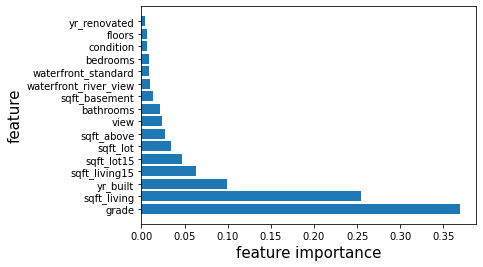

In [11]:
import matplotlib.pyplot as plt


plt.barh(feature_importances["col_name"], feature_importances["feature_importance"], align='center')

plt.xlabel('feature importance', size=15)

plt.ylabel('feature', size=15)

plt.show()